'da:'

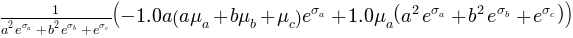

'db:'

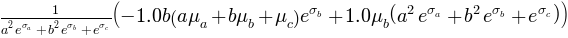

In [15]:
#プロトタイプ
%matplotlib inline
from IPython.display import display
from sympy import *
init_printing()
y,a,b,c,ua,ub,uc,sa,sb,sc = symbols('y,a,b,c,mu_a,mu_b,mu_c,sigma_a,sigma_b,sigma_c')
s = sqrt(exp(sa)*a*a+exp(sb)*b*b+exp(sc))
v = (ua*a+ub*b+uc)/s
f = 0.5*erfc(-v/sqrt(2))
p = exp(-v**2/2)/sqrt(2*pi)/s
#display(f,p,"du:",simplify(diff(f,ua)/p),"ds:",simplify(diff(f,sa)/p),"dx:",simplify(diff(f,a)/p))
display("da:",simplify(diff(f,a)/p),"db:",simplify(diff(f,b)/p))

array([[ 0.,  0.,  0.,  0.]])

array([[False, False, False, False]], dtype=bool)

array([[ 0.,  0.,  0.,  1.]])

array([[False,  True, False,  True]], dtype=bool)

array([[ 0.,  0.,  1.,  0.]])

array([[False,  True,  True, False]], dtype=bool)

array([[ 0.,  1.,  0.,  0.]])

array([[False,  True,  True,  True]], dtype=bool)

array([[ 1.,  0.,  0.,  0.]])

array([[ True, False, False, False]], dtype=bool)

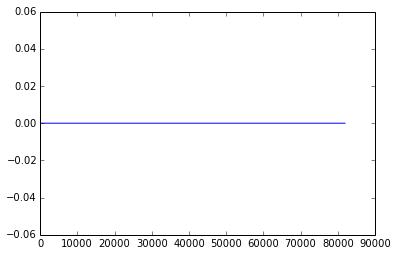

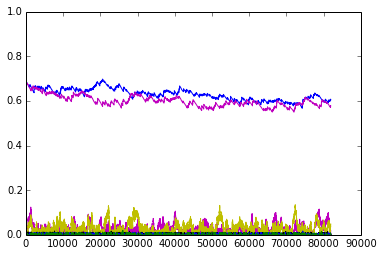

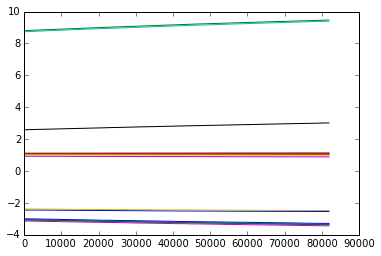

In [364]:
#プロトタイプ 1層
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import erfc, erf
I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0  ],[0,0,1  ],[0,1,0  ],[0,1,1  ],[1,0,0  ]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

if False:
    WU = normal(size=(4,3))
    WS = ones(shape(WU))
    BU = normal(size=(4,1))
    BS = ones(shape(BU))
    
elif False:
    WS += pi
    BS += pi

r = 1/16.0
err = []
epoch = 5 * ( 2 ** 14 )
u = zeros((16,epoch))
s = zeros((16,epoch))

def error(J, D, Y):
    return J * ( D - Y )

def delta(J, D, P, Q):
    E = J
    row, col = shape(J)
    for r in range(row):
        for c in range(col):
            if 0 < P[r,c] and 0 < Q[r,c]:
                #Cross Entropy
                E[r,c] *= D[r,c]/P[r,c] - (1-D[r,c])/Q[r,c]
            else:
                E[r,c] *= 0#D[r,c] - Y[r,c]
    return E

for k in range(epoch):
    X = I[ k % 5 ]
    Y = O[ k % 5 ]
    
    W = normal(size=shape(WU))*exp(0.5*WS)+WU
    B = normal(size=shape(BU))*exp(0.5*BS)+BU
    
    V = dot(W, X) + B
    
    VU = dot(WU,      X   ) + BU
    VV = dot(exp(WS), X**2) + exp(BS)
    VS = sqrt(VV)
    
    F = array(0 < V, dtype='float64')

    J = exp(-(-VU)**2/VV/2.0)/sqrt(pi)/VS/sqrt(2)
    D = sign(Y-F)*J#/P/Q
    WU = WU + r * (D).dot(X.T)
    BU = BU + r * (D)
    WS = WS - r * 0.5 * exp(WS) * ((D*VU/VV).dot(X.T**2))
    BS = BS - r * 0.5 * exp(BS) * ((D*VU/VV))
    
    WU = maximum(0,minimum(1,WU))
    BU = maximum(0,minimum(1,BU))
    
    err.append(dot(E.T, E)[0])
    u[0:12,k] = reshape(WU, (12))
    u[12:16,k] = reshape(BU, (4))
    s[0:12,k] = reshape(WS, (12))
    s[12:16,k] = reshape(BS, (4))

for k in range(5):
    X = I[k]
    Y = O[k]
    VU = dot(WU,    X   )+BU
    VV = dot(exp(WS), X**2)+exp(BS)
    VS = sqrt(VV)
    F = 0 < VU
    P = 0.5 * erfc(-VU/VS/sqrt(2))
    display(Y.T, F.T)

figure();plot(log(err))
figure();plot(u.T)
figure();plot(s.T)

array([[ 0.,  0.,  0.,  0.]])

array([[False, False, False, False]], dtype=bool)

array([[-3.91942683, -3.97364344, -2.48260321, -1.8736947 ]])

array([[ 0.,  0.,  0.,  1.]])

array([[False, False, False,  True]], dtype=bool)

array([[-2.53887988, -1.04454207, -3.7418961 ,  0.42814914]])

array([[ 0.,  0.,  1.,  0.]])

array([[False, False, False, False]], dtype=bool)

array([[-4.62233392, -1.19510625, -2.96052251, -1.03887372]])

array([[ 0.,  1.,  0.,  0.]])

array([[False,  True, False, False]], dtype=bool)

array([[-3.59330495,  0.95080609, -4.99861042, -0.61486055]])

array([[ 1.,  0.,  0.,  0.]])

array([[ True, False, False, False]], dtype=bool)

array([[  2.80465556, -10.4683951 ,  -4.08878969,  -1.6642097 ]])

array([[ 641.26883111,  640.58308643,  641.26637723,  640.66469861]])

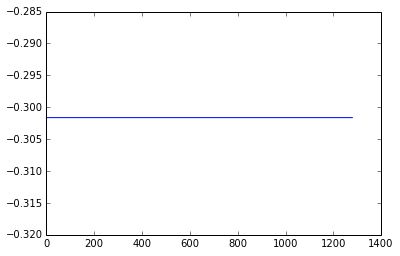

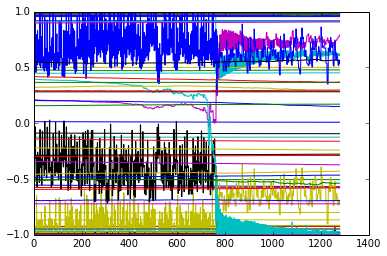

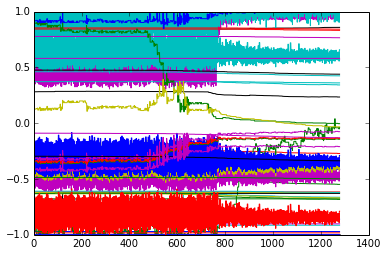

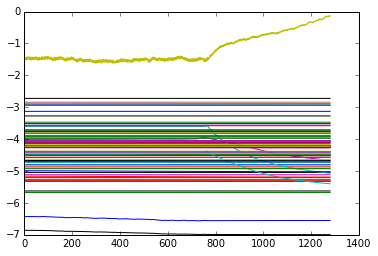

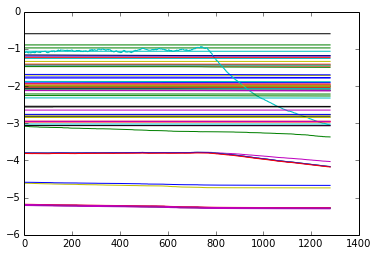

In [411]:
#プロトタイプ 2層
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import erf, erfc

#I=map(lambda v:transpose(array([v],dtype='float64')),[[1,1,1,1],[0,0,1,1],[0,0,1,1],[1,1,0,0],[1,1,0,0]])
#I=map(lambda v:transpose(array([v],dtype='float64')),[[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1]])
I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

r = 1/16.0
err = []
epoch = 5 * ( 2 ** 8 )

HUT = zeros((epoch,80))
HVT = zeros((epoch,80))

OUT = zeros((epoch,68))
OVT = zeros((epoch,68))

if False:
    HAu = normal(size=(16,4))
    HAv = zeros(shape(HAu))

    HBu = zeros((16,1))
    HBv = zeros(shape(HBu))

    OAu = normal(size=(4,16))
    OAv = zeros(shape(OAu))

    OBu = zeros((4,1))
    OBv = zeros(shape(OBu))

likelyhood = 0
for k in range(epoch):
    i = k%5#int(uniform(0,5))
    X = I[ i ]
    Y = O[ i ]
    
    for iter in range(64):
    
        HX = X
        HA = normal(size=shape(HAu))*exp(0.5*HAv)+HAu
        HB = normal(size=shape(HBu))*exp(0.5*HBv)+HBu
    
        HVu = dot(HAu,      HX   ) + HBu
        HVv = dot(exp(HAv), HX**2) + exp(HBv)
        HVs = sqrt(HVv)
    
        HF = (0 < dot(HA, HX) + HB)
    
        OX = HF
        OA = normal(size=shape(OAu))*exp(0.5*OAv)+OAu
        OB = normal(size=shape(OBu))*exp(0.5*OBv)+OBu
    
        OVu = dot(OAu,      OX   ) + OBu
        OVv = dot(exp(OAv), OX**2) + exp(OBv)
        OVs = sqrt(OVv)
    
        OF = (0 < dot(OA, OX) + OB)

        OJ = exp(-(-OVu)**2/OVv/2.0)/sqrt(2*pi)/OVs
        OD = (Y-OF)*OJ# / OP / OQ#delta(OJ, Y, OP, OQ)#    OD = OJ * (OY - OF)
    
        OAu = maximum(-1,minimum(1,OAu + r * (OD).dot(OX.T)))
        OBu = maximum(-1,minimum(1,OBu + r * (OD)))
        OAv = OAv - r * 0.5 * (exp(OAv)*((OD*OVu/OVv).dot(OX.T**2)))
        OBv = OBv - r * 0.5 * (exp(OBv)*((OD*OVu/OVv)))
    
        HJ = exp(-(-HVu)**2/HVv/2.0)/sqrt(2*pi)/HVs
        HD = sign(dot((OAu+outer(OVu/OVv,OX)*exp(OAv)).T,OD))*HJ
#        HD = sign(dot(OA.T, OD))*HJ
    
        HAu = maximum(-1,minimum(1,HAu + r * (HD).dot(HX.T)))
        HBu = maximum(-1,minimum(1,HBu + r * (HD)))
        HAv = HAv - r * 0.5 * (exp(HAv)*((HD*HVu/HVv).dot(HX.T**2)))
        HBv = HBv - r * 0.5 * (exp(HBv)*((HD*HVu/HVv)))

#        HAv = HAv * 0.0 - pi
#        HBv = HBv * 0.0 - pi 
#        OAv = OAv * 0.0 - pi 
#        OBv = OBv * 0.0 - pi
        
    HUT[k,0:64] = reshape(HAu,(64))
    HUT[k,64:80] = reshape(HBu,(16))
    HVT[k,0:64] = reshape(HAv,(64))
    HVT[k,64:80] = reshape(HBv,(16))
    
    OUT[k,0:64] = reshape(OAu,(64))
    OUT[k,64:68] = reshape(OBu,(4))
    OVT[k,0:64] = reshape(OAv,(64))
    OVT[k,64:68] = reshape(OBv,(4))

    err.append(dot(E.T, E)[0])
    likelyhood -= Y*log(OP)+(1-Y)*log(1-OP)
    if k > epoch - 6:
        display(k, Y.T, OF.T, (dot(OA, OX) + OB).T)


        
#display(HAv,HBv,OAs,OBs)
display(likelyhood.T,sum(likelyhood))
figure();plot(log(err))
figure();plot(HUT)
figure();plot(OUT)
figure();plot(HVT)
figure();plot(OVT)

In [399]:
exp(OVu)

array([[  1.42892904e+01],
       [  6.12650043e-03],
       [  6.98269032e-04],
       [  4.83945286e-02]])

In [ ]:
#プロトタイプ 3層
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import erf, erfc

#I=map(lambda v:transpose(array([v],dtype='float64')),[[1,1,1,1],[0,0,1,1],[0,0,1,1],[1,1,0,0],[1,1,0,0]])
I=map(lambda v:transpose(array([v],dtype='float64')),[[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1]])
#I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

r = 1/4.0
err = []
esfrWTWps = 1.0e-24
epoch = 5 * ( 2 ** 8 )

if True:
    HAu = normal(size=(512,4))
    HAv = zeros(shape(HAu))

    HBu = zeros((512,1))
    HBv = zeros(shape(HBu))

    GAu = normal(size=(512,512))
    GAv = zeros(shape(GAu))
    
    GBu = zeros((512,1))
    GBv = zeros(shape(GBu))
    
    OAu = normal(size=(4,512))
    OAv = zeros(shape(OAu))

    OBu = zeros((4,1))
    OBv = zeros(shape(OBu))
    
def error(J, T, P, Q):
    return J * (T-P)

def delta(J, T, P, Q):
    A = P
    B = Q
    C = T
    D = (1-T)
    E = J*(C/A-D/B)
    NG = logical_or(isnan(E), isinf(E))
    E[NG] = 0
    return E

likelyhood = 0
histgram = zeros((4,4))
for k in range(epoch):
    i = k%5#int(uniform(0,5))
    X = I[ i ]
    Y = O[ i ]
    
    #H
    HX = X
    HA = normal(size=shape(HAu))*exp(0.5*HAv)+HAu
    HB = normal(size=shape(HBu))*exp(0.5*HBv)+HBu
    
    HVu = dot(HAu,      HX   ) + HBu
    HVv = dot(exp(HAv), HX**2) + exp(HBv)
    HVs = sqrt(HVv)
    
    HF = (0 < dot(HA, HX) + HB).astype('float64')
    HP = (0.5-2*eps) * erfc( (-HVu)/HVs/sqrt(2)) + eps
    HQ = (0.5-2*eps) * erfc(-(-HVu)/HVs/sqrt(2)) + eps
    
    #G
    GX = HF
    GA = normal(size=shape(GAu))*exp(0.5*GAv)+GAu
    GB = normal(size=shape(GBu))*exp(0.5*GBv)+GBu
    
    GVu = dot(GAu,      GX   ) + GBu
    GVv = dot(exp(GAv), GX**2) + exp(GBv)
    GVs = sqrt(GVv)
    
    GF = (0 < dot(GA, GX) + GB).astype('float64')
    GP = (0.5-2*eps) * erfc( (-GVu)/GVs/sqrt(2)) + eps
    GQ = (0.5-2*eps) * erfc(-(-GVu)/GVs/sqrt(2)) + eps
    
    #O
    OX = GF
    OA = normal(size=shape(OAu))*exp(0.5*OAv)+OAu
    OB = normal(size=shape(OBu))*exp(0.5*OBv)+OBu
    
    OVu = dot(OAu,      OX   ) + OBu
    OVv = dot(exp(OAv), OX**2) + exp(OBv)
    OVs = sqrt(OVv)
    
    OF = (0 < dot(OA, OX) + OB).astype('float64')
    OP = (0.5-2*eps) * erfc( (-OVu)/OVs/sqrt(2)) + eps
    OQ = (0.5-2*eps) * erfc(-(-OVu)/OVs/sqrt(2)) + eps

    E = Y - OP
    
    #O
    OJ = exp(-(-OVu)**2/OVv/2.0)/sqrt(pi)/OVs/sqrt(2)
    OD = OJ * (Y-OP) / OP / OQ#delta(OJ, Y, OP, OQ)#    OD = OJ * (OY - OF)
    
    OAu = OAu + r * (OD).dot(OX.T)
    OBu = OBu + r * (OD)
    OAv = OAv - r * 0.5 * (exp(OAv) * ((OD*OVu/OVv).dot(OX.T**2)))
    OBv = OBv - r * 0.5 * (exp(OBv) * ((OD*OVu/OVv)))

    #G
    GJ = exp(-(-GVu)**2/GVv/2.0)/sqrt(pi)/GVs/sqrt(2)
    GD = GJ * (GF+sign(dot(OA.T, OD))-GP) / GP / GQ
    
    GAu = GAu + r * (GD).dot(GX.T)
    GBu = GBu + r * (GD)
    GAv = GAv - r * 0.5 * (exp(GAv) * ((GD*GVu/GVv).dot(GX.T**2)))
    GBv = GBv - r * 0.5 * (exp(GBv) * ((GD*GVu/GVv)))
    
    #H
    HJ = exp(-(-HVu)**2/HVv/2.0)/sqrt(pi)/HVs/sqrt(2)
    HD = HJ * (HF+sign(dot(GA.T, GD))-HP) / HP / HQ
    
    HAu = HAu + r * (HD).dot(HX.T)
    HBu = HBu + r * (HD)
    HAv = HAv - r * 0.5 * (exp(HAv) * ((HD*HVu/HVv).dot(HX.T**2)))
    HBv = HBv - r * 0.5 * (exp(HBv) * ((HD*HVu/HVv)))
    
    err.append(dot(E.T, E)[0])
    if i:
        histgram[i-1,:] += OF[:,0]
        
    if k > epoch - 6:
        if i:
            figure();plot([0,1,2,3],histgram[i-1])
            
        likelyhood -= (Y)*log(OP)+(1-Y)*log(1-OP)
        display(k, Y.T, OP.T)
        
#display(HAv,HBv,OAs,OBs)
display(likelyhood.T)
figure();plot(log(err))

In [ ]:
#角層クロスエントロピー
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
HB=normal(0, 0.1, (4, 1))
HW=normal(0, 0.1, (4, 4))
OB=normal(0, 0.1, (4, 1))
OW=normal(0, 0.1, (4, 4))

eps = 0.05
k = 0
r = 8
err = []
for idx in range(2**14):
    k = idx % 5
    Ik = I[k]
    Ok = O[k]
    HO = (0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB)))
    OO = (0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB)))
    
    E = Ok - OO
    err.append(E.T.dot(E)[0])

    #O update
    E = Ok - OO
    C = (Ok)/(OO) - (1-Ok)/(1-OO)
    DB = r * ( 1 - OO * OO ) * C
    DB[isnan(DB)] = 0
    DB[isinf(DB)] = sign(DB[isinf(DB)])
    DX = HO + eps * dot(inv(OW), DB)
    
    DW = dot(DB, transpose(HO))
    OW = OW + eps * DW
    OB = OB + eps * DB

    #H update
    E = DX - HO
    C = (DX)/(HO) - (1-DX)/(1-HO)
    DB = r * ( 1 - HO * HO ) * C
    DB[isnan(DB)] = 0
    DB[isinf(DB)] = sign(DB[isinf(DB)])
    DX = dot(transpose(HW), DB)
    
    DW = dot(DB, transpose(Ik))
    HW = HW + eps * DW
    HB = HB + eps * DB

for k in range(5):
    Ik = I[k]
    Ok = O[k]
    HO = 0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB))
    OO = 0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB))
    display(k, Ik.T, OO.T)

plot(log(err))

0

array([[0, 0, 0, 0]])

array([[  1.84403087e-02,   9.25287306e-01,   1.21981190e-04,
          2.86842775e-03]])

1

array([[0, 0, 0, 1]])

array([[  7.01972967e-04,   2.66241476e-02,   3.02034596e-05,
          9.39043218e-01]])

2

array([[0, 0, 1, 0]])

array([[  2.65398814e-13,   1.04821707e-12,   1.00000000e+00,
          0.00000000e+00]])

3

array([[0, 0, 1, 1]])

array([[  4.82417462e-09,   1.00000000e+00,   7.94975197e-13,
          4.78617146e-13]])

4

array([[0, 1, 0, 0]])

array([[  1.00000000e+00,   0.00000000e+00,   1.75914838e-13,
          0.00000000e+00]])

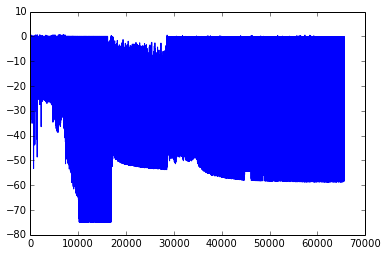

In [11]:
#角層最急降下法
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
I=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
if False:
    HB=normal(0, 1, (16, 1))
    HW=normal(0, 1, (16, 4))
    OB=normal(0, 1, (4,  1))
    OW=normal(0, 1, (4, 16))

eps = 0.05
k = 0
r = 8
err = []
for idx in range(2**16):
    k = idx % 5
    Ik = I[k]
    Ok = O[k]
    HO = (0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB)))# > uniform(0, 1, (16, 1))
    OO = (0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB)))# > uniform(0, 1, (4, 1))

    E = Ok - OO
    err.append(E.T.dot(E)[0])

    #O update
    DB = r * ( 1 - OO * OO ) * ( Ok - OO )
    DX = dot(transpose(OW), Ok)
    
    OW = OW + eps * dot(DB, transpose(HO))
    OB = OB + eps * DB

    #H update
    DB = r * ( 1 - HO * HO ) * ( DX - HO )
    DX = dot(transpose(HW), DB)
    
    DW = dot(DB, transpose(Ik))
    HW = HW + eps * DW
    HB = HB + eps * DB

for k in range(5):
    Ik = I[k]
    Ok = O[k]
    HO = 0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB))
    OO = 0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB))
    display(k, Ik.T, OO.T)

plot(log(err))

0

array([[0, 0, 0, 0]])

array([[  1.00000000e+00,   0.00000000e+00,   9.21019407e-08,
          8.69021188e-10]])

1

array([[0, 0, 0, 1]])

array([[  1.00000000e+00,   3.79180885e-05,   3.31401573e-14,
          1.00000000e+00]])

2

array([[0, 0, 1, 0]])

array([[  1.00000000e+00,   3.41884368e-05,   9.99137292e-01,
          9.99999931e-01]])

3

array([[0, 0, 1, 1]])

array([[  1.00000000e+00,   9.94415769e-01,   5.75690386e-08,
          1.00000000e+00]])

4

array([[0, 1, 0, 0]])

array([[  1.00000000e+00,   0.00000000e+00,   8.64599997e-08,
          7.97188482e-10]])

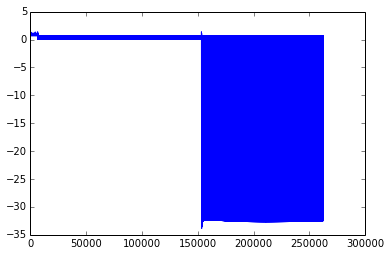

In [7]:
#ただの最急降下法
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
I=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

HB=normal(0, 1, (16, 1))
HW=normal(0, 1, (16, 4))
OB=normal(0, 1, (4,  1))
OW=normal(0, 1, (4, 16))

eps = 0.05
k = 0
r = 4
err = []
for idx in range(2**18):
    k = idx % 5
    Ik = I[k]
    Ok = O[k]
    HO = (0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB)))# > uniform(0, 1, (16, 1))
    OO = (0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB)))# > uniform(0, 1, (4, 1))

    DX = Ok - OO
    E = Ok - OO
    err.append(E.T.dot(E)[0])

    #O update
    DB = DX * r * (1 - OO * OO)
    DX = dot(transpose(OW), DB)
    
    OW = OW + eps * dot(DB, transpose(HO))
    OB = OB + eps * DB

    #H update
    DB = DX * r * (1 - HO * HO)
    DX = dot(transpose(HW), DB)
    
    HW = HW + eps * dot(DB, transpose(Ik))
    HB = HB + eps * DB

for k in range(5):
    Ik = I[k]
    Ok = O[k]
    HO = 0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB))
    OO = 0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB))
    display(k, Ik.T, OO.T)
    
plot(log(err))

In [100]:
display(1e-4)

0.0001

In [189]:
from sympy import *
d,y=symbols('d,y')
solve(d*(1-y)-y*(1-d),y)